# The Question
In this piece, we make an effort to study if the introduction of vaccines cause any change in crimes? 
The reasons for why this maybe a useful inference: 
1. Vaccines could've been a very limited resource initially and people would want to make sure they get it as soon
no matter what.
2. Anti-vaxxers!!!


# Null Hypothesis Ho
### H0: The start of COVID vaccinations didn't cause any "change" in number of crime incidents.

To study this, we compute average crime incidents reported per day in the ~15 days interval before and after vaccinations went live. We use paired Wald's test as the statistic to measure the significance.

In [43]:
import datetime

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from scipy.stats import norm

# Exploratory Data Analysis
But first let's exlore the data a bit.

In [2]:
states = ['indiana', 'georgia']
dfs = []
for state in states:
    df = pd.read_csv(f'./{state}_vaccinations.csv')
    df['Date'] = pd.to_datetime(df['Date'])
    dfs.append(df)
in_vacc, georgia_vacc = dfs[:]

In [3]:
in_vacc.head()

,Date,Daily Administered
0,2020-12-14,0.0
1,2020-12-15,0.0
2,2020-12-16,0.0
3,2020-12-17,686.0
4,2020-12-18,2092.0


In [4]:
in_vacc.tail()

,Date,Daily Administered
490,2022-05-05,6426.0
491,2022-05-06,6021.0
492,2022-05-07,6047.0
493,2022-05-08,6831.0
494,2022-05-09,3613.0


In [5]:
georgia_vacc.head()

,Date,Daily Administered
0,2020-12-14,0.0
1,2020-12-15,0.0
2,2020-12-16,0.0
3,2020-12-17,0.0
4,2020-12-18,198.0


In [6]:
georgia_vacc.tail()

,Date,Daily Administered
479,2022-05-05,8753.0
480,2022-05-06,11189.0
481,2022-05-07,9993.0
482,2022-05-08,171.0
483,2022-05-09,1.0


For both datasets, the record starts from '2020-12-14' and end on '2022-05-09'

<AxesSubplot:>

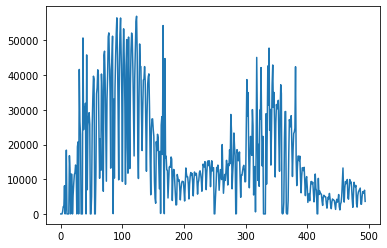

In [7]:
in_vacc['Daily Administered'].plot()

<AxesSubplot:>

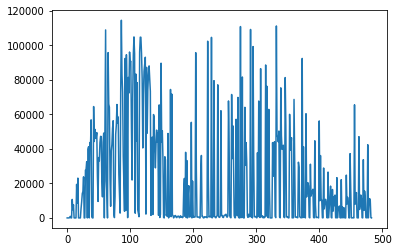

In [8]:
georgia_vacc['Daily Administered'].plot()

## Slice vaccination data
Our crime incident dataset has information only until Dec 2020 so we slice the vaccine data until that date.

In [9]:
in_vacc = in_vacc[in_vacc['Date'] < '2021-01-01']
georgia_vacc = georgia_vacc[georgia_vacc['Date'] < '2021-01-01']

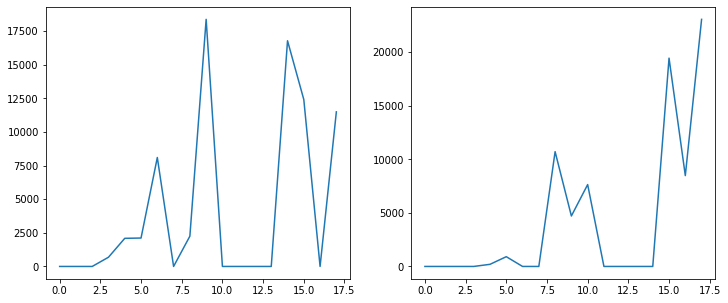

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

ax[0].plot(in_vacc['Date'].index, in_vacc['Daily Administered'])
ax[1].plot(georgia_vacc['Date'].index, georgia_vacc['Daily Administered'])

We would like to see if people started having crazy thoughts about vaccines. And if their crazy thoughts made them commit petty crimes.

# Indiana: Crime Incidents Before and After Vaccinations

Since the crime "incident" dataset is only available between 15th Dec 2020 and 31st Dec 2020, and vaccinations start on 14th Dec 2020, we analyze the difference in crime 15 days before and 15 days after vaccinations started.

In [12]:
before_vacc_start = '2020-12-01'
before_vacc_end = '2020-12-13'

after_vacc_start = '2020-12-14'
after_vacc_end = '2020-12-31'

In [13]:
# get incident count
indiana_crime_incidents = "dataset/IN/NIBRS_incident.csv"
ic_df = pd.read_csv(indiana_crime_incidents)
ic_df['INCIDENT_DATE'] = pd.to_datetime(ic_df['INCIDENT_DATE'])
ic_df = ic_df.sort_values(by = ['INCIDENT_DATE'])

ic_df["INCIDENT_COUNT"] = 1

### Compute before stats

In [24]:
ic_before = ic_df[(ic_df['INCIDENT_DATE'] >= before_vacc_start) & (ic_df['INCIDENT_DATE'] <= before_vacc_end)]

ic_before_count = len(ic_before.groupby(by = ["INCIDENT_DATE"]).agg('sum')["INCIDENT_COUNT"])
ic_before_mean_incidents = ic_before.groupby(by = ["INCIDENT_DATE"]).agg('sum')["INCIDENT_COUNT"].mean()
ic_before_var_incidents = ic_before.groupby(by = ["INCIDENT_DATE"]).agg('sum')["INCIDENT_COUNT"].var()

print(f'Before: Count={ic_before_count}, Mean={ic_before_mean_incidents}, Var={ic_before_var_incidents}')

Before: Count=13, Mean=528.0769230769231, Var=3193.5769230769233


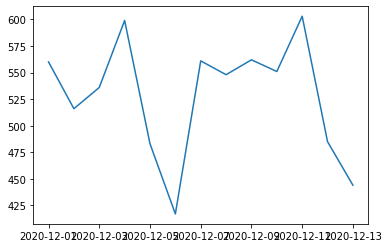

In [38]:
plt.plot(ic_before.groupby(by = ["INCIDENT_DATE"]).agg('sum')["INCIDENT_COUNT"])

### Compute after stats

In [25]:
ic_after = ic_df[(ic_df['INCIDENT_DATE'] >= after_vacc_start) & (ic_df['INCIDENT_DATE'] <= after_vacc_end)]

ic_after_count = len(ic_after.groupby(by = ["INCIDENT_DATE"]).agg('sum')["INCIDENT_COUNT"])
ic_after_mean_incidents = ic_after.groupby(by = ["INCIDENT_DATE"]).agg('sum')["INCIDENT_COUNT"].mean()
ic_after_var_incidents = ic_after.groupby(by = ["INCIDENT_DATE"]).agg('sum')["INCIDENT_COUNT"].var()

print(f'After: Count={ic_after_count}, Mean={ic_after_mean_incidents}, Var={ic_after_var_incidents}')

After: Count=18, Mean=471.8333333333333, Var=5460.264705882352


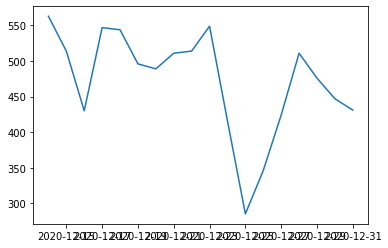

In [40]:
plt.plot(ic_after.groupby(by = ["INCIDENT_DATE"]).agg('sum')["INCIDENT_COUNT"])

### Compute Wald's Statistic
This is a two tailed Wald's test. We computed sample means of count of incidents and check it against alpha=0.05

In [49]:
delta = ic_after_mean_incidents - ic_before_mean_incidents
W = delta / math.sqrt(ic_after_var_incidents/ic_after_count + ic_before_var_incidents/ic_before_count)
print(f'W = {W}')
p_val = (1 - norm.cdf(abs(W), 0, 1)) * 2
print(f'p-value = {p_val} < 0.05? | Reject Null: {p_val < 0.05}')

W = -2.400400858168235
p-value = 0.016377126422557176 < 0.05? | Reject Null: True


# Georgia: Crime Incidents Before and After Vaccinations

Since the crime "incident" dataset is only available between 15th Dec 2020 and 31st Dec 2020, and vaccinations start on 14th Dec 2020, we analyze the difference in crime 15 days before and 15 days after vaccinations started.

In [29]:
# get incident count
georgia_crime_incidents = "dataset/GA/NIBRS_incident.csv"
ga_df = pd.read_csv(georgia_crime_incidents)
ga_df['INCIDENT_DATE'] = pd.to_datetime(ga_df['INCIDENT_DATE'])
ga_df = ga_df.sort_values(by = ['INCIDENT_DATE'])

ga_df["INCIDENT_COUNT"] = 1

### Compute before stats

In [31]:
ga_before = ga_df[(ga_df['INCIDENT_DATE'] >= before_vacc_start) & (ga_df['INCIDENT_DATE'] <= before_vacc_end)]

ga_before_count = len(ga_before.groupby(by = ["INCIDENT_DATE"]).agg('sum')["INCIDENT_COUNT"])
ga_before_mean_incidents = ga_before.groupby(by = ["INCIDENT_DATE"]).agg('sum')["INCIDENT_COUNT"].mean()
ga_before_var_incidents = ga_before.groupby(by = ["INCIDENT_DATE"]).agg('sum')["INCIDENT_COUNT"].var()

print(f'Before: Count={ga_before_count}, Mean={ga_before_mean_incidents}, Var={ga_before_var_incidents}')

Before: Count=13, Mean=943.6153846153846, Var=6963.25641025641


### Compute after stats

In [32]:
ga_after = ga_df[(ga_df['INCIDENT_DATE'] >= after_vacc_start) & (ga_df['INCIDENT_DATE'] <= after_vacc_end)]

ga_after_count = len(ga_after.groupby(by = ["INCIDENT_DATE"]).agg('sum')["INCIDENT_COUNT"])
ga_after_mean_incidents = ga_after.groupby(by = ["INCIDENT_DATE"]).agg('sum')["INCIDENT_COUNT"].mean()
ga_after_var_incidents = ga_after.groupby(by = ["INCIDENT_DATE"]).agg('sum')["INCIDENT_COUNT"].var()

print(f'After: Count={ga_after_count}, Mean={ga_after_mean_incidents}, Var={ga_after_var_incidents}')

After: Count=18, Mean=885.2222222222222, Var=12899.830065359478


### Compute Wald's Statistic
This is a two tailed Wald's test. We computed sample means of count of incidents and check it against alpha=0.05

In [50]:
delta = ga_after_mean_incidents - ga_before_mean_incidents
W = delta / math.sqrt(ga_after_var_incidents/ga_after_count + ga_before_var_incidents/ga_before_count)
print(f'W = {W}')
p_val = (1 - norm.cdf(abs(W), 0, 1)) * 2
print(f'p-value = {p_val} < 0.05? | Reject Null: {p_val < 0.05}')

W = -1.6500957087439831
p-value = 0.0989233623179373 < 0.05? | Reject Null: False


## Applicability of Wald's test
Since we are modeling the number of occurrences of a random event, that is the number of crime incidents each day, we think of the data following a Poisson distribution. The MLE estimate of Poisson is the sample mean. Since MLE estimates are Asymptotically Normal, we can apply Wald's test here.

# Inference
In this piece, we tried evaluating a probably unheard of hypothesis i.e. trying to find if vaccinations and crimes are correlated. This information might be useful to detect early signs of coordinated crimes for a certain scarce resource. But we do agree that this could also come from a latent factor not seen in the study (such as an ongoing social issue).

For the state of Indiana, Wald's statistic rejects null hypotheses whereas for the state of Georgia, it fails to reject the null hypothesis. This may not be easily understood in this example just by looking at the plots which to some extent proves usefulness of statistical tests we learned in the class.